# Machine Learning for Heat-pump Power Estimation

## Introduction to heat-pump

## Why Heat-pump?

Heat pumps are becoming increasingly popular as a way to heat and cool homes and buildings. Here are some reasons why we should move towards the use of heat pumps:
1.	Energy Efficiency: Heat pumps are highly energy efficient compared to traditional heating and cooling systems, such as furnaces and old air conditioners. They can provide up to four times the amount of energy they consume, making them a more cost-effective option in the long run.
2.	Lower Environmental Impact: Heat pumps have a lower environmental impact than traditional heating and cooling systems. They produce fewer greenhouse gas emissions and use less fossil fuels, helping to reduce carbon footprint.
3.	Versatility: Heat pumps can provide both heating and cooling, making them a versatile option for all seasons. They can also be used for domestic hot water production.
4.	Improved Indoor Air Quality: Heat pumps do not burn fuel, which means there is no combustion, which in turn means no indoor air pollution. This leads to improved indoor air quality and a healthier living environment.
5.	Long Lifespan: Heat pumps have a long lifespan compared to traditional heating and cooling systems, making them a more durable and reliable option.
6.	Lower Maintenance Costs: Heat pumps require less maintenance than traditional heating and cooling systems, as they have fewer mechanical parts that can wear out or break down.

Overall, heat pumps are a highly efficient and cost-effective option for heating and cooling homes and buildings, while also providing benefits to the environment and indoor air quality.


## What is Heat-pump?

A heat pump is a heating and cooling system that moves heat from one place to another. It uses a small amount of energy to move heat from the air or ground outside a building to the inside, or from the inside to the outside, depending on the season.

In the winter, a heat pump absorbs heat from the outdoor air, even in cold temperatures, and transfers it inside to warm the building. In the summer, the process is reversed, and heat is transferred from the inside to the outside to cool the building.


### General refrigerant circuit

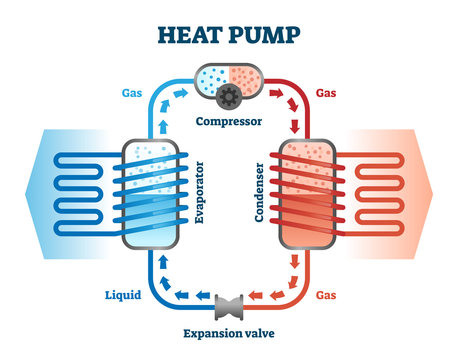


### Heat-pump types

- air-to-air,
- air-to-water,
- water-to-water (ground-source).

### Space heating and domestic hot water circuit for air-to-water

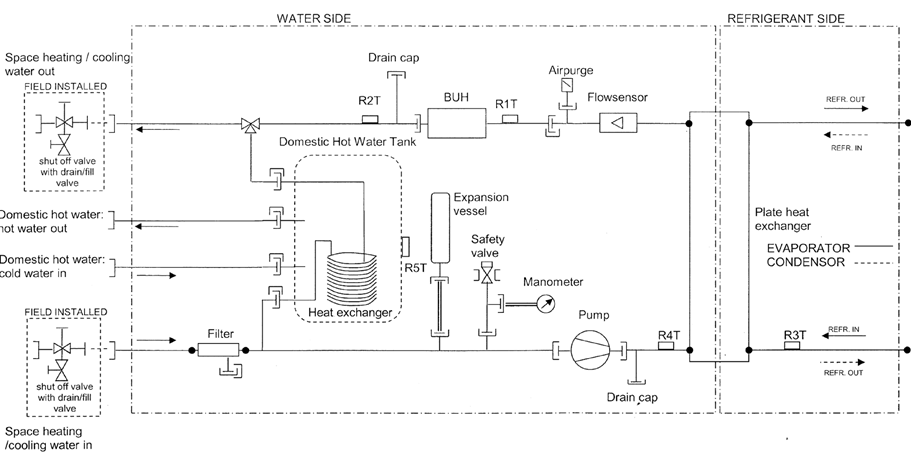

## Problem definition

### Description

We want to find the average daily electrical consumption for space heating in an air-to-water heat-pump as a function of other measured items as ambient temperature and room temperature. 


$\textbf{Note:}$ The electrical consumption consists of 3 main values:
- Heat-pump (mainy compressor and the most favorite as it comes with higher COPs~3)
- Back-up-heater (purely resistance heating of the water with COP=1)


For this, we use real data from one field-site.

### Task 1: With the real data provided, perform the following tasks:
- Extract and analyse the data,
- Indicate what machine learning techniques could be used, and for which purpose,
- Indicate the potential business(es) value of the data and how it could be monetized,
- Accompany the answer with supporting and meaningful data representations.


$\textbf{Note:}$ Use your libraries of interest from Python. Provide the version of your Python and used libraries.

Description

 Required Steps:
 1. Read csv data using pandas library
 2. Filter dataset on rows with status_3wv = 0 to get relevant data for space heating
 3. Compute the difference between room temperature and ambient temperature as a new feature
 4. Compute the difference between setpoint and ambient temperature as a new feature
 5. Compute the summation of compressor power consumption and back-up-heater or resistance power consumption as target variable

Python and Libraries

In [3]:
import pandas as pd
from datetime import datetime

!pip list | findstr pandas

pandas                        1.5.3


Code

In [4]:
# Read data and Filter dataset on rows with status_3wv = 0

data = pd.read_csv("fs_altherma_1y.csv")
data = data.loc[data['status_3wv'] == 0]
data.head()

,hp_elec_input_kw,status_3wv,rt_sp_heating,rt_temp,ambient_temp,buh_elec_input_kw,timestamp
0,0.0,0,22.0,21.799999,2.0,0.0,1646607547446
1,0.0,0,22.0,21.799999,2.0,0.0,1646607557453
2,0.0,0,22.0,21.799999,2.0,0.0,1646607569096
3,0.0,0,22.0,21.799999,2.0,0.0,1646607579115
4,0.0,0,22.0,21.799999,2.0,0.0,1646607589451


In [6]:
# Add new features 'rt_amb_dif' , 'sp_rt_dif' and 'total_elec_input_kw'

data['rt_amb_dif'] = data['rt_temp'] - data['ambient_temp']
data['sp_rt_dif'] = data['rt_sp_heating'] - data['rt_temp']
data['total_elec_input_kw'] = data['hp_elec_input_kw'] + data['buh_elec_input_kw']

In [7]:
# correlation between dependant variables and target variable 'total_elec_input_kw'

df_final = data[['total_elec_input_kw', 'rt_amb_dif', 'sp_rt_dif', 'timestamp']]
df_final[['rt_amb_dif', 'sp_rt_dif', 'timestamp']].corrwith(df_final['total_elec_input_kw'])

rt_amb_dif    0.411747
sp_rt_dif     0.213625
timestamp    -0.070470
dtype: float64

### Task 2: Develop an ML-based model of electrical daily consumption estimation for the heatpump. Provide the description and the code below.

$\textbf{Note:}$ Use your libraries of interest from Python. Provide the version of your Python and used libraries.

Description

To make the estimation of electrical consumption we develope three ML models based on following development phases:
1. Define X, Y datasets as input and output
2. Split datasets to train and test datasets
3. Train 3 ML models (Linear Regression, Random Forest and Decision Trees) based on train dataset. Random Forest and Decision Trees are ensemble models which are suitable models for timeseried data with high prediction accuracy.
4. Make predictions
5. Evaluate models
6. Visualize the predicted test data vs actual test data

Python and Libraries

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error, accuracy_score  
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#####  Provide the version of your Python and used libraries
- ######  There are several way to get the vesrion of used libraries like pip list or conda list commands.
- ######  To show the version of single package we use 'pip list | findstr <package-name>' command

In [9]:
from platform import python_version
print('python_version:  ', python_version())

!!pip list 

python_version:   3.10.9


['Package                       Version',
 '----------------------------- ---------------',
 'alabaster                     0.7.12',
 'anaconda-client               1.11.1',
 'anaconda-navigator            2.4.0',
 'anaconda-project              0.11.1',
 'anyio                         3.5.0',
 'appdirs                       1.4.4',
 'argon2-cffi                   21.3.0',
 'argon2-cffi-bindings          21.2.0',
 'arrow                         1.2.3',
 'astroid                       2.14.2',
 'astropy                       5.1',
 'asttokens                     2.0.5',
 'atomicwrites                  1.4.0',
 'attrs                         22.1.0',
 'Automat                       20.2.0',
 'autopep8                      1.6.0',
 'Babel                         2.11.0',
 'backcall                      0.2.0',
 'backports.functools-lru-cache 1.6.4',
 'backports.tempfile            1.0',
 'backports.weakref             1.0.post1',
 'bcrypt                        3.2.0',
 'beautifulsoup4   

In [27]:
!pip list | findstr numpy 

numpy                         1.23.5
numpydoc                      1.5.0


In [15]:
!conda list

# packages in environment at C:\ProgramData\anaconda3:
#
# Name                    Version                   Build  Channel
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda-client           1.11.1          py310haa95532_0  
anaconda-navigator        2.4.0           py310haa95532_0  
anaconda-project          0.11.1          py310haa95532_0  
anyio                     3.5.0           py310haa95532_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0          py310h2bbff1b_0  
arrow                     1.2.3           py310haa95532_1  
astroid                   2.14.2          py310haa95532_0  
astropy                   5.1             py310h9128911_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
atomicwrites              1.4.0                      py_0  
attrs                     22.1.0          py310haa95532_0  
automat                   20.2.0    

Code

#### Model Development

In [10]:
# determine x & y fetures

x = df_final.drop('total_elec_input_kw', axis = 1)
y = df_final['total_elec_input_kw']

# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

# Initializing the models
LR = LinearRegression()
RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
DT = DecisionTreeRegressor(max_depth=5)


In [11]:
# Fitting the Linear Regression model to the data
LR.fit(x_train, y_train)

y_pred_LR = LR.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred_LR)), '.3f'))
print("\nRMSE of Linear Regression: ", rmse)
r_sq = LR.score(x, y)
print(f"coefficient of determination: {r_sq}")


RMSE of Linear Regression:  0.469
coefficient of determination: 0.17392855690723374


In [12]:
# Fitting the Random Forest model to the data
RF.fit(x_train, y_train)

y_pred_RF = RF.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred_RF)), '.3f'))
print("\nRMSE of Linear Regression: ", rmse)
r_sq = RF.score(x, y)
print(f"coefficient of determination: {r_sq}")


RMSE of Linear Regression:  0.083
coefficient of determination: 0.9791716693007521


In [13]:
# Fitting the Random Forest model to the data
DT.fit(x_train, y_train)

y_pred_DT = DT.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred_DT)), '.3f'))
print("\nRMSE of Linear Regression: ", rmse)
r_sq = DT.score(x, y)
print(f"coefficient of determination: {r_sq}")


RMSE of Linear Regression:  0.401
coefficient of determination: 0.3938583015659196


##### Get Daily value of predictions and Visualize the performance of models 

In [14]:
y_pred_LR = pd.Series(y_pred_LR)
y_pred_RF = pd.Series(y_pred_RF)
y_pred_DT = pd.Series(y_pred_DT)

y_pred_LR = y_pred_LR.set_axis(y_test.index)
y_pred_RF = y_pred_RF.set_axis(y_test.index)
y_pred_DT = y_pred_DT.set_axis(y_test.index)

df_pred_actual = pd.concat([y_test],axis=1)
df_pred_actual['y_pred_LR'] = y_pred_LR
df_pred_actual['y_pred_RF'] = y_pred_RF
df_pred_actual['y_pred_DT'] = y_pred_DT
df_pred_actual['timestamp'] = x_test['timestamp']

df_pred_actual = df_pred_actual.sort_index()

for index, row in df_pred_actual.iterrows():
    timestamp = str(row['timestamp'])[:13]
    your_dt = datetime.fromtimestamp(int(timestamp)/1000).strftime("%Y-%m-%d")
    df_pred_actual.loc[index, "timestamp"] = your_dt
    
df_pred_actual.head()

,total_elec_input_kw,y_pred_LR,y_pred_RF,y_pred_DT,timestamp
3,0.0,0.527879,0.0,0.969279,2022-03-06
33,0.0,0.527887,0.0,0.969279,2022-03-07
44,0.0,0.527890,0.0,0.969279,2022-03-07
49,0.0,0.527892,0.0,0.969279,2022-03-07
57,0.0,0.527894,0.0,0.969279,2022-03-07


In [15]:
df_pred_actual['timestamp'] = pd.to_datetime(df_pred_actual['timestamp'], errors='coerce')

df_pred_actual_group = df_pred_actual.groupby(df_pred_actual.timestamp)[['total_elec_input_kw', 'y_pred_LR', 'y_pred_RF', 'y_pred_DT']].sum()


In [16]:
df_pred_actual_group

,total_elec_input_kw,y_pred_LR,y_pred_RF,y_pred_DT
timestamp,,,,
2022-03-06,0.00,0.527879,0.000000,0.969279
2022-03-07,542.00,725.703293,544.261050,711.804982
2022-03-08,540.00,558.115770,531.481663,490.580162
2022-03-09,499.75,309.453253,505.676621,328.305250
2022-03-10,230.25,208.290656,233.425097,193.992471
2022-03-11,116.00,167.920095,115.559973,192.809918
2022-03-12,145.50,231.153927,141.597144,171.234200
2022-03-13,191.25,154.077752,190.587134,102.098843
2022-03-14,219.75,256.155768,215.590334,152.131607


In [17]:
df_pred_actual_group.shape

(45, 4)

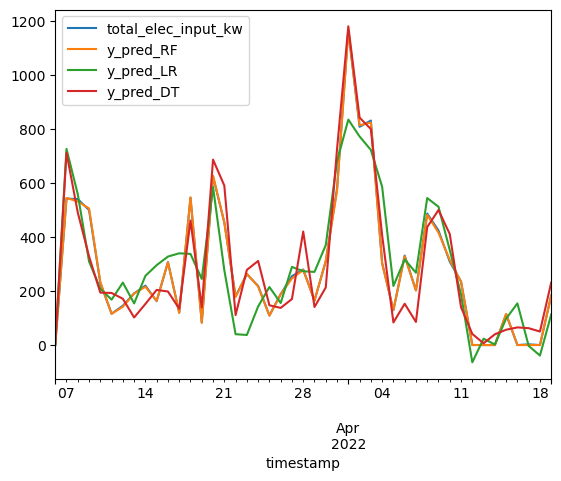

In [18]:
df_pred_actual_group.plot( y=["total_elec_input_kw", "y_pred_RF", "y_pred_LR", "y_pred_DT" ])
plt.show()


### Task 3: Explain step by steps how to:
- Develop the data-pipeline. 
- Save the ML model.
- Deploy the pipeline and the model on a real platform (for instance edge or cloud).

#### Answer
there are two ways to save the ML model:

method_1: using pickle file and Flask website

1. save the model as pickle file 
2. Build a Flask website to serve as a Model
3. and finally deploy ML Flask web app To AWS

method_2: using Amazon SageMaker
1. Create a SageMaker notebook instance
2. Prepare the data
3. Train the model to learn from the data
4. Deploy the model

### Task 4: AWS Deploy strategies
- Provide strategies for data representation of the analysis carried out in Task 2 using AWS tools. 
- Provide a schema using AWS tools of how to deploy the pipeline of Task 3.

#### Answer

Using Amazon SageMaker Data Wrangler we can build an analysis that enable us to generate visualizationslike Histogram or Scatter plot and data analysis in a few clicks. We can also create custom analyses using customized code.

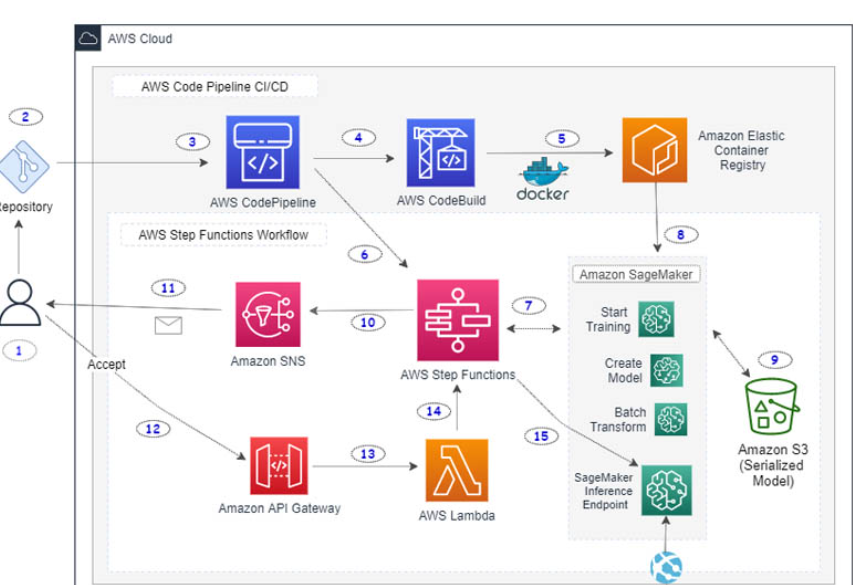